# Secondary Protein Analysis

In [2]:
%load_ext autoreload

%autoreload 2

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
file_place = r"C:\Users\Conor\DataSets"

Breast_DF = pd.read_pickle(file_place + r"\Breast_data_raw")

In [5]:
import os

Secondary_Proteins = pd.read_pickle(os.path.join(os.getcwd(), "Secondary_Proteins"))

In [6]:
Secondary_Proteins

,912,916,920,924,928,932,936,940,944,948,...,1764,1768,1772,1776,1780,1784,1788,1792,1796,1800
level_0,,,,,,,,,,,,,,,,,,,,,
DNA,0.003690,0.003693,0.003696,0.003700,0.003703,0.003695,0.003669,0.003643,0.003617,0.003591,...,0.003779,0.003760,0.003741,0.003723,0.003704,0.003685,0.003675,0.003667,0.003659,0.003651
Glycogen,0.004341,0.004346,0.004337,0.004327,0.004318,0.004308,0.004299,0.004294,0.004290,0.004287,...,0.004282,0.004284,0.004286,0.004288,0.004289,0.004289,0.004289,0.004289,0.004289,0.004291
Lipid,0.004293,0.004297,0.004301,0.004305,0.004308,0.004312,0.004317,0.004331,0.004345,0.004359,...,0.004465,0.004407,0.004350,0.004297,0.004284,0.004270,0.004257,0.004244,0.004231,0.004218
Protein,0.000817,0.000797,0.000777,0.000756,0.000736,0.000715,0.000705,0.000705,0.000705,0.000705,...,0.001057,0.001057,0.001057,0.001057,0.001057,0.001057,0.001057,0.001057,0.001057,0.001057
RNA,0.003463,0.003456,0.003449,0.003442,0.003435,0.003439,0.003448,0.003457,0.003466,0.003476,...,0.003754,0.003682,0.003622,0.003561,0.003501,0.003445,0.003439,0.003433,0.003427,0.003421


In [7]:
Breast_Secondary_Proteins = pd.DataFrame(np.matmul(Breast_DF.values, Secondary_Proteins.values.T)
                                         , index = Breast_DF.index, columns = Secondary_Proteins.index)

In [71]:
Breast_Secondary_Proteins.head()

level_0                                                                  DNA  \
Sex Type      Stage Pathology                 Grade Label Age Core             
F   Malignant IIa   Invasive ductal carcinoma 1     Blood 40  B4    0.180650   
                                                              B4    0.179921   
                                                              B4    0.177945   
                                                              B4    0.174843   
                                                              B4    0.171194   

level_0                                                             Glycogen  \
Sex Type      Stage Pathology                 Grade Label Age Core             
F   Malignant IIa   Invasive ductal carcinoma 1     Blood 40  B4    0.173750   
                                                              B4    0.173046   
                                                              B4    0.171137   
                                                              B4    0.168128   
                                                              B4    0.164579   

level_0                                                                Lipid  \
Sex Type      Stage Pathology                 Grade Label Age Core             
F   Malignant IIa   Invasive ductal carcinoma 1     Blood 40  B4    0.174208   
                                                              B4    0.173463   
                                                              B4    0.171430   
                                                              B4    0.168226   
                                                              B4    0.164437   

level_0                                                              Protein  \
Sex Type      Stage Pathology                 Grade Label Age Core             
F   Malignant IIa   Invasive ductal carcinoma 1     Blood 40  B4    0.267604   
                                                              B4    0.267052   
                                                              B4    0.265571   
                                                              B4    0.263124   
                                                              B4    0.260100   

level_0                                                                  RNA  
Sex Type      Stage Pathology                 Grade Label Age Core            
F   Malignant IIa   Invasive ductal carcinoma 1     Blood 40  B4    0.185834  
                                                              B4    0.185071  
                                                              B4    0.182998  
                                                              B4    0.179727  
                                                              B4    0.175862

# LDA

In [30]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [80]:
LDA_df = pd.DataFrame(LinearDiscriminantAnalysis(n_components = 1).fit_transform(Breast_Secondary_Proteins.values,
                                                                    Breast_Secondary_Proteins.reset_index()["Grade"]), index = Breast_Secondary_Proteins.index)

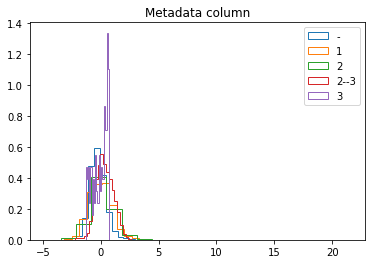

In [89]:
plt.clf()
plt.title("Metadata column")

for name, df in LDA_df.groupby(level = "Grade"):
    
    sample = df.values.reshape(-1,1)
    
    plt.hist(sample, label = name, histtype = "step", bins  = 20, density = True)
    
    #plt.scatter(sample[0], sample[1], label = name, alpha = 0.5, s  = 2)
    
plt.legend()
plt.show()

<Figure size 432x288 with 0 Axes>

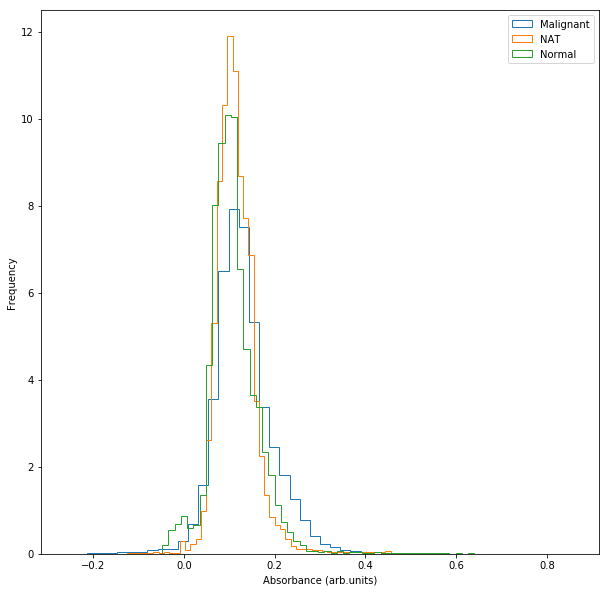

In [90]:
plt.clf()
fig = plt.figure(figsize = (10,10))
fig.patch.set_facecolor([1,1,1])



for name, df in Breast_Secondary_Proteins.groupby("Type"):
    
    plt.hist(df["Glycogen"], label = name, histtype = "step", density = True, bins = 50)
    #plt.scatter(df["RNA"], df["Protein"], label = name, s  = 2)

plt.xlabel("Absorbance (arb.units)")
plt.ylabel("Frequency")

plt.legend()
plt.show()

In [10]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

C:\Users\Conor\Anaconda3\lib\importlib\_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
C:\Users\Conor\Anaconda3\lib\importlib\_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
C:\Users\Conor\Anaconda3\lib\importlib\_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
C:\Users\Conor\Anaconda3\lib\importlib\_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
C:\Users\Conor\Anaconda3\lib\site-packages\scipy\_lib\_numpy_compat.py:10: DeprecationWarning: Importing from numpy.testing.nosetester is deprecated since 1.15.0, import from numpy.testing instead.
  from numpy.testing.nosetester import import_

In [11]:
import os
from scipy.io import loadmat

file_place = r"C:\Users\Conor\Desktop\Breast Cancer Data\br20832_cores\br20832_cores"
file_list = os.listdir(file_place)

image_list_directory = r"C:\Users\Conor\Desktop\Breast Cancer Data\overlay\overlay"
image_list = os.listdir(image_list_directory)

images = {file_name[:-4] : loadmat(os.path.join(file_place, file_name)) for file_name in file_list[:3]}

C:\Users\Conor\Anaconda3\lib\importlib\_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)


In [12]:
images.keys()

dict_keys(['A1', 'A10', 'A11'])

In [13]:
from sklearn.decomposition import PCA

C:\Users\Conor\Anaconda3\lib\importlib\_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)


In [14]:
image = images["A11"]["image"]

In [15]:
pca = PCA(n_components = 1).fit(image.reshape(-1, image.shape[-1]))#.reshape(image.shape[0], image.shape[1], 3)

In [16]:
pca.explained_variance_ratio_.sum()

0.8771081752909715

In [26]:
new_image = pca.transform(image.reshape(-1, image.shape[-1])).reshape(image.shape[0], image.shape[1], -3)

In [27]:
new_image.shape

(313, 313, 1)

In [25]:
plt.clf()

plt.imshow(new_image)

plt.show()

TypeError: Invalid dimensions for image data